In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import precision_recall_fscore_support as score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.models import Sequential  
from keras.layers import *  
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, KFold

In [127]:
df=pd.read_csv('data1.csv',encoding='iso-8859-1')

C:\Users\Fenil\AppData\Local\Temp\ipykernel_27180\2351773997.py:1: DtypeWarning: Columns (79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data1.csv',encoding='iso-8859-1')


In [128]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaN,60,Egypt,10,...,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaN,92,India,6,...,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN
2,202101010006,2021,1,1,NaN,0,NaN,228,Yemen,10,...,There is doubt that this incident meets terror...,"""Civilian reportedly dies of injuries from Hou...","""UN troubled by civilian deaths in Yemen's Hud...","""Five women killed in Yemen wedding attack,"" G...",START Primary Collection,0,0,0,0,NaN
3,202101010009,2021,1,1,NaN,0,NaN,4,Afghanistan,6,...,There is doubt that this incident meets terror...,"""Afghanistan- Ghor Provincial Council Member K...","""Journalist killed on 1st day of new year in A...","""Afghanistan: 2021 Begins with Assassination o...",START Primary Collection,-9,-9,0,-9,NaN
4,202101010024,2021,1,2,NaN,0,NaN,182,Somalia,11,...,NaN,"""Jubbaland lawmaker killed in car bomb blast,""...","""Somali lawmaker killed in a sticky bomb attac...","""Al-Shabab claims killing regional MP in south...",START Primary Collection,0,0,0,0,NaN


In [129]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         int64  
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           int64  
 23   alternative         float64
 24   al

In [130]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,4.960000e+03,4960.0,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4925.000000,4925.000000,4960.000000,...,3.100000e+01,25.000000,28.000000,25.00,492.000000,477.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,2.021039e+11,2021.0,3.744960,15.882661,0.092742,104.888105,7.989919,23.383896,45.878268,1.627218,...,1.561928e+05,-7.920000,4626.768214,-3.96,5.469512,-48.870021,-3.828226,-3.725605,0.077016,-3.354234
std,1.722388e+06,0.0,1.717634,8.731039,0.290100,102.172216,2.571796,15.067020,38.467789,0.969772,...,4.876805e+05,27.411859,14357.672650,19.80,1.818967,52.315662,4.519270,4.615386,0.266644,4.592457
min,2.021010e+11,2021.0,1.000000,1.000000,0.000000,4.000000,1.000000,-84.671596,-128.072000,1.000000,...,-9.900000e+01,-99.000000,-99.000000,-99.00,1.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
25%,2.021022e+11,2021.0,2.000000,8.000000,0.000000,4.000000,6.000000,12.849085,33.286871,1.000000,...,7.720000e+02,0.000000,-31.500000,0.00,4.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.021042e+11,2021.0,4.000000,16.000000,0.000000,95.000000,8.000000,31.544475,45.324871,1.000000,...,1.204700e+04,0.000000,0.000000,0.00,6.000000,-99.000000,0.000000,0.000000,0.000000,0.000000
75%,2.021052e+11,2021.0,5.000000,24.000000,0.000000,153.000000,10.000000,34.513277,68.999537,2.000000,...,5.880133e+04,0.000000,1016.465000,0.00,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.021073e+11,2021.0,6.000000,31.000000,1.000000,1004.000000,12.000000,59.450075,140.768766,5.000000,...,2.504858e+06,0.000000,72315.600000,0.00,7.000000,200.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df.duplicated().sum()

0

In [132]:
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage.sort_values(ascending = False).head(60)

gsubname3             100.000000
weaptype4             100.000000
weaptype4_txt         100.000000
weapsubtype4          100.000000
weapsubtype4_txt      100.000000
divert                 99.979839
claimmode3_txt         99.979839
claimmode3             99.979839
kidhijcountry          99.979839
compclaim              99.858871
claimmode2_txt         99.858871
claimmode2             99.858871
gsubname2              99.838710
claim3                 99.758065
guncertain3            99.758065
gname3                 99.758065
ransomnote             99.596774
ransomamtus            99.495968
ransompaidus           99.495968
ransompaid             99.435484
ransomamt              99.375000
targsubtype3_txt       98.729839
targsubtype3           98.729839
targtype3_txt          98.729839
target3                98.729839
targtype3              98.729839
natlty3                98.729839
natlty3_txt            98.729839
corp3                  98.729839
attacktype3            98.669355
attacktype

In [133]:
null_columns = null_percentage[null_percentage.values>85].index
null_columns.value_counts()

approxdate        1
resolution        1
claimmode3        1
claimmode3_txt    1
compclaim         1
                 ..
gsubname3         1
motive            1
guncertain2       1
guncertain3       1
nreleased         1
Length: 64, dtype: int64

In [134]:
df.drop(null_columns, axis=1, inplace=True)

In [135]:
null_percentage.sort_values(ascending = False).head(60)

gsubname3             100.000000
weaptype4             100.000000
weaptype4_txt         100.000000
weapsubtype4          100.000000
weapsubtype4_txt      100.000000
divert                 99.979839
claimmode3_txt         99.979839
claimmode3             99.979839
kidhijcountry          99.979839
compclaim              99.858871
claimmode2_txt         99.858871
claimmode2             99.858871
gsubname2              99.838710
claim3                 99.758065
guncertain3            99.758065
gname3                 99.758065
ransomnote             99.596774
ransomamtus            99.495968
ransompaidus           99.495968
ransompaid             99.435484
ransomamt              99.375000
targsubtype3_txt       98.729839
targsubtype3           98.729839
targtype3_txt          98.729839
target3                98.729839
targtype3              98.729839
natlty3                98.729839
natlty3_txt            98.729839
corp3                  98.729839
attacktype3            98.669355
attacktype

In [136]:
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage.sort_values(ascending = False).head(60)

claimmode_txt       82.258065
claimmode           82.258065
related             80.524194
alternative         75.020161
alternative_txt     75.020161
addnotes            70.463710
scite3              65.806452
propvalue           61.411290
propextent_txt      61.290323
propextent          61.290323
propcomment         61.189516
weapdetail          60.745968
location            59.314516
scite2              40.423387
weapsubtype1        15.987903
weapsubtype1_txt    15.987903
nwound              15.504032
nkill                8.548387
nwoundte             8.528226
nkillter             6.310484
targsubtype1         3.689516
targsubtype1_txt     3.689516
natlty1              1.209677
natlty1_txt          1.209677
longitude            0.705645
latitude             0.705645
multiple             0.040323
nkillus              0.020161
nwoundus             0.020161
country              0.000000
city                 0.000000
provstate            0.000000
property             0.000000
region_txt

In [137]:
null_columns = null_percentage[null_percentage.values>60].index
null_columns.value_counts()

alternative        1
alternative_txt    1
claimmode          1
claimmode_txt      1
weapdetail         1
propextent         1
propextent_txt     1
propvalue          1
propcomment        1
addnotes           1
scite3             1
related            1
dtype: int64

In [138]:
df.drop(null_columns, axis=1, inplace=True)

In [139]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundte,property,ishostkid,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,202101010004,2021,1,1,0,60,Egypt,10,Middle East & North Africa,North Sinai,...,0.0,1,0,"""Egyptian officials: Roadside bombing in Sinai...",NaN,START Primary Collection,-9,-9,0,-9
1,202101010005,2021,1,1,0,92,India,6,South Asia,Jammu and Kashmir,...,0.0,0,0,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",START Primary Collection,-9,-9,0,-9
2,202101010006,2021,1,1,0,228,Yemen,10,Middle East & North Africa,Al Hudaydah,...,0.0,1,0,"""Civilian reportedly dies of injuries from Hou...","""UN troubled by civilian deaths in Yemen's Hud...",START Primary Collection,0,0,0,0
3,202101010009,2021,1,1,0,4,Afghanistan,6,South Asia,Ghor,...,0.0,1,0,"""Afghanistan- Ghor Provincial Council Member K...","""Journalist killed on 1st day of new year in A...",START Primary Collection,-9,-9,0,-9
4,202101010024,2021,1,2,0,182,Somalia,11,Sub-Saharan Africa,Lower Juba,...,0.0,1,0,"""Jubbaland lawmaker killed in car bomb blast,""...","""Somali lawmaker killed in a sticky bomb attac...",START Primary Collection,0,0,0,0


In [140]:
ull_percentage = df.isnull().sum() * 100 / len(df)
null_percentage[null_percentage>0].sort_values(ascending = False)

claimmode_txt       82.258065
claimmode           82.258065
related             80.524194
alternative         75.020161
alternative_txt     75.020161
addnotes            70.463710
scite3              65.806452
propvalue           61.411290
propextent_txt      61.290323
propextent          61.290323
propcomment         61.189516
weapdetail          60.745968
location            59.314516
scite2              40.423387
weapsubtype1        15.987903
weapsubtype1_txt    15.987903
nwound              15.504032
nkill                8.548387
nwoundte             8.528226
nkillter             6.310484
targsubtype1_txt     3.689516
targsubtype1         3.689516
natlty1_txt          1.209677
natlty1              1.209677
longitude            0.705645
latitude             0.705645
multiple             0.040323
nwoundus             0.020161
nkillus              0.020161
dtype: float64

In [141]:
df.shape

(4960, 59)

In [142]:
df.doubtterr.value_counts()

0    3721
1    1239
Name: doubtterr, dtype: int64

In [143]:
# count the number of unique values in each column
unique_counts = df.nunique()

# filter the columns based on unique value count
df = df.loc[:, unique_counts > 1]
df.head()

,eventid,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,nwoundus,nwoundte,property,ishostkid,scite1,scite2,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,202101010004,1,1,0,60,Egypt,10,Middle East & North Africa,North Sinai,Beir al-Abd,...,0.0,0.0,1,0,"""Egyptian officials: Roadside bombing in Sinai...",NaN,-9,-9,0,-9
1,202101010005,1,1,0,92,India,6,South Asia,Jammu and Kashmir,Pampore,...,0.0,0.0,0,0,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",-9,-9,0,-9
2,202101010006,1,1,0,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Hudaydah,...,0.0,0.0,1,0,"""Civilian reportedly dies of injuries from Hou...","""UN troubled by civilian deaths in Yemen's Hud...",0,0,0,0
3,202101010009,1,1,0,4,Afghanistan,6,South Asia,Ghor,Feroz Koh,...,0.0,0.0,1,0,"""Afghanistan- Ghor Provincial Council Member K...","""Journalist killed on 1st day of new year in A...",-9,-9,0,-9
4,202101010024,1,2,0,182,Somalia,11,Sub-Saharan Africa,Lower Juba,Kismayo,...,0.0,0.0,1,0,"""Jubbaland lawmaker killed in car bomb blast,""...","""Somali lawmaker killed in a sticky bomb attac...",0,0,0,0


In [144]:
# Get the number of rows in the DataFrame
num_rows = len(df)

# Get the number of unique values in each column
unique_counts = df.nunique()

# Select the columns where the number of unique values is equal to the number of rows
result = unique_counts[unique_counts == num_rows].index.tolist()

# Print the result
print(result)

['eventid']


In [145]:
df.crit1.value_counts()

1    4886
0      74
Name: crit1, dtype: int64

In [146]:
df['scite1']

0       "Egyptian officials: Roadside bombing in Sinai...
1       "Terror module busted, seven arrested in J&K,"...
2       "Civilian reportedly dies of injuries from Hou...
3       "Afghanistan- Ghor Provincial Council Member K...
4       "Jubbaland lawmaker killed in car bomb blast,"...
                              ...                        
4955    "Gunmen blow up power pylon in Parwan," Afghan...
4956    "Spring Revolution Daily News for 16-30 June 2...
4957    "Boko Haram Releases Abducted Catholic Priest ...
4958    "Two dead and one wounded after clashes betwee...
4959    "Spring Revolution Daily News for 2-7 July 202...
Name: scite1, Length: 4960, dtype: object

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           4960 non-null   int64  
 1   imonth            4960 non-null   int64  
 2   iday              4960 non-null   int64  
 3   extended          4960 non-null   int64  
 4   country           4960 non-null   int64  
 5   country_txt       4960 non-null   object 
 6   region            4960 non-null   int64  
 7   region_txt        4960 non-null   object 
 8   provstate         4960 non-null   object 
 9   city              4960 non-null   object 
 10  latitude          4925 non-null   float64
 11  longitude         4925 non-null   float64
 12  specificity       4960 non-null   int64  
 13  vicinity          4960 non-null   int64  
 14  location          2018 non-null   object 
 15  summary           4960 non-null   object 
 16  crit1             4960 non-null   int64  


In [148]:
df=pd.read_csv('data4.csv')

In [149]:
print(df.isnull().sum())

eventid           0
region            0
summary           0
success           0
suicide           0
attacktype     2000
targtype       2000
target         2000
gname          2000
weaptype       2000
weapsubtype    2793
site              0
target.1          0
dtype: int64


In [150]:
df.fillna('Nan',inplace=True)

In [151]:
print(df.isnull().sum())

eventid        0
region         0
summary        0
success        0
suicide        0
attacktype     0
targtype       0
target         0
gname          0
weaptype       0
weapsubtype    0
site           0
target.1       0
dtype: int64


In [152]:
df['final']=df['summary']+' '+df['site']

In [153]:
punctuation_signs = list("?:!.,;")
df['final'] = df['final']

for punct_sign in punctuation_signs:   
    df['final'] = df['final'].str.replace(punct_sign, ' ')

C:\Users\Fenil\AppData\Local\Temp\ipykernel_27180\4130806535.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['final'] = df['final'].str.replace(punct_sign, ' ')


In [154]:
import nltk
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
from joblib import dump, load

In [155]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['final'] = df['final'].str.replace(regex_stopword, ' ')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fenil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Fenil\AppData\Local\Temp\ipykernel_27180\3061063838.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['final'] = df['final'].str.replace(regex_stopword, ' ')


In [156]:
df['final'] = df['final'].apply(lambda x: x.replace('\n', ' '))
df['final'] = df['final'].apply(lambda x: x.replace('\t', ' '))
df['final'] = df['final'].str.replace("    ", " ")
df['final'] = df['final'].str.replace('"', '')
df['final'] = df['final'].str.replace("'s", "")

In [157]:
cv = CountVectorizer(max_features = 200)
X = cv.fit_transform(df['final']).toarray()
y = df['target.1']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [159]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)

accuracy is:  1.0


In [160]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)

accuracy is:  0.9992816091954023


In [161]:
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)

accuracy is:  1.0


In [162]:
%%time
# svm1=sklearn.linear_model.SGDClassifier(kernel='sigmoid',gamma='auto',C=100)
# svm1=SGDClassifier(max_iter=1000, tol=1e-3)
svm1=svm.SVC(kernel='rbf',gamma='auto',C=100)
svm1.fit(X_train,y_train)
y_pred=svm1.predict(X_test)
print("accuracy score of SVM :",accuracy_score(y_test,y_pred))

accuracy score of SVM : 1.0
Wall time: 185 ms


In [163]:
%%time
dtree=tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print("accuracy score of DT :",accuracy_score(y_test,y_pred))

accuracy score of DT : 0.9992816091954023
Wall time: 16.3 ms


In [164]:
%%time
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("accuracy score of naive bayes :",accuracy_score(y_test,y_pred))

accuracy score of naive bayes : 1.0
Wall time: 24 ms


In [165]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

In [166]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10 
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
87/87 [==============================] - 28s 297ms/step - loss: 0.4776 - accuracy: 0.7031 - val_loss: 0.3443 - val_accuracy: 0.7126
Epoch 2/10
87/87 [==============================] - 3623s 42s/step - loss: 0.2855 - accuracy: 0.8060 - val_loss: 0.2042 - val_accuracy: 0.9116
Epoch 3/10
87/87 [==============================] - 477s 6s/step - loss: 0.2400 - accuracy: 0.8418 - val_loss: 0.1602 - val_accuracy: 0.9476
Epoch 4/10
87/87 [==============================] - 27s 316ms/step - loss: 0.1820 - accuracy: 0.9037 - val_loss: 0.1055 - val_accuracy: 0.9720
Epoch 5/10
87/87 [==============================] - 27s 306ms/step - loss: 0.1638 - accuracy: 0.9386 - val_loss: 0.1173 - val_accuracy: 0.9684
Epoch 6/10
87/87 [==============================] - 26s 305ms/step - loss: 0.1186 - accuracy: 0.9551 - val_loss: 0.1258 - val_accuracy: 0.9511
Epoch 7/10
87/87 [==============================] - 27s 313ms/step - loss: 0.0933 - accuracy: 0.9621 - val_loss: 0.0752 - val_accuracy: 0.9763
E

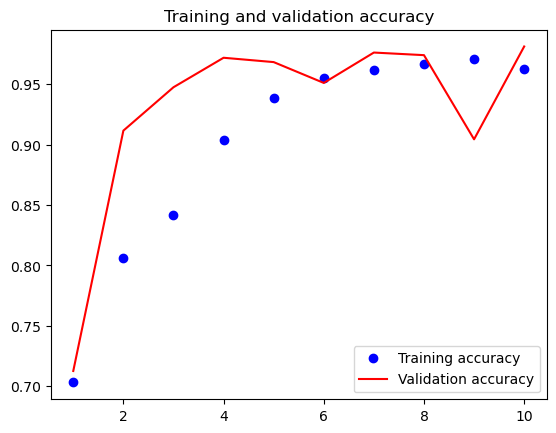

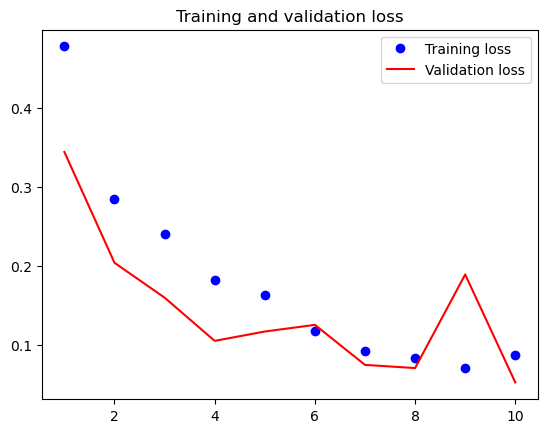

In [167]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()